# Step 1: Business Objective :

In [ ]:
Every author, have their own style of writing which includes their signature fashion of using certain words, 
making their literature unique and recognisable
There are 50 authors who each has written 50 text snippets or quotes 
Our aim is to identify the author who has written that particular text snippet based upon the analysis done on 
their way of writing techniques on his or her own previous writings

# Step 2: Transformed into Data Science Problem :

In [ ]:
“Given Text Snippets/Quotes from all these 50 authors 
identify that who is the author of the text snippet or quote”

# Step 3: Creating  Features based on the data given :

In [1]:
import nltk
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.feature_selection import RFE
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk import FreqDist
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
import os
from afinn import Afinn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
stopword = set(stopwords.words('english'))
import string
import numpy as np
from sklearn.preprocessing import RobustScaler

In [4]:
pip install afinn

     |████████████████████████████████| 61kB 240kB/s eta 0:00:01
  Stored in directory: /Users/shilpyjain/Library/Caches/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn
Note: you may need to restart the kernel to use updated packages.


In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
ps=PorterStemmer()

In [4]:
data_dir = '/Users/shilpyjain/Downloads/C50train/'
auth_files_ls = []
for author in os.listdir(data_dir):
    if author != '.DS_Store':
        for files in os.listdir(os.path.join(data_dir, author)):
            _filename = os.path.join(data_dir, author, files)
            with open(_filename, 'r') as f:
                txt = f.read()
            #Feat 1: total number of sentences
            total_sents = len(nltk.sent_tokenize(txt))
            #Feat 2: total number of words (raw)
            total_tokens_raw = len(nltk.word_tokenize(txt))
            #Feat 3:total no. of tokens (words) when all words in lower case
            total_tokens_lower = len(nltk.word_tokenize(txt.lower()))
            # Feat 4: Total unique no; of words in lower case
            unique_tokens_lower = len(set(nltk.word_tokenize(txt.lower())))
            # Feat 5:Total unique no; of tokens in lower case & stemmed
            unique_tokens_lower_stem = len(set([ps.stem(w) for w in nltk.word_tokenize(txt.lower())]))
            # Feat 6: Total unique no; of tokens in lower case + stemmed - stopwords
            tokens_lower_stem_sword= len(set([ps.stem(w) for w in nltk.word_tokenize(txt.lower()) if ps.stem(w) not in stopword_af]))
            # Feat 7: total counts of all stopwords (duplicate also considered)
            stopw_count=len([ps.stem(w) for w in nltk.word_tokenize(txt.lower()) if w in stopword_af ])
            # Feat 8:Total no; of punctuations 
            total_puncts = len([char for char in txt if char in string.punctuation])
            # Feat 9:Total nouns in lower+stemmed tokens
            lower_stem_ls=[ps.stem(w) for w in nltk.word_tokenize(txt.lower())]
            nouns=len([i[0] for i in nltk.pos_tag(lower_stem_ls) if i[1] in ['NN','NNS','NNP','NNPS']])
            #Feat 10:Total verbs in lower+stemmed tokens
            verbs=len([i[0] for i in nltk.pos_tag(lower_stem_ls) if i[1] in ['VB','VBD','VBG','VBN','VBP','VBZ']])
            #Feat 11:Average words per sentence
            avg_words=len(re.split('[\s]',txt))/len(nltk.sent_tokenize(txt))
            #Feat 12:Average words length (lower case + stemmed - stop words)
            lower_sword_ls = [word for word in (nltk.word_tokenize(txt.lower())) if word not in stopword_af]
            avg_word_len=sum([len(w) for w in lower_sword_ls])/len(lower_sword_ls)
            #Feat 13 :Sentiment score 
            lower_stem_sword=[ps.stem(w) for w in nltk.word_tokenize(txt.lower()) if w not in stopword_af]
            sentiment_score=sum([af.score(w) for w in lower_stem_sword])
            auth_files_ls.append({
                'total_sents': total_sents,
                'total_tokens_raw': total_tokens_raw,
                'total_tokens_lower': total_tokens_lower,
                'unique_tokens_lower': unique_tokens_lower,
                'unique_tokens_lower_stem': unique_tokens_lower_stem,
                'tokens_lower_stem_sword':tokens_lower_stem_sword,
                'stopw_count':stopw_count,
                'total_puncts':total_puncts,
                'nouns':nouns,
                'verbs':verbs,
                'avg_words':avg_words,
                'avg_word_len':avg_word_len,
                'sentiment_score':sentiment_score,
                'author':author
            })
auth_df = pd.DataFrame(auth_files_ls)

In [6]:
len(stopword)

179

## Subtracting the stop words which has sentiment score 0 in affin.txt file:

In [3]:
af = Afinn()
stopword = set(stopwords.words('english'))
stopword_af=[w for w in stopword if af.score(w)==0]

In [7]:
len(stopword_af)

176

## Total Unique words ( Lower case + stemmed - stop words):

In [7]:
print(unique_tokens_lower_stem)

249


In [8]:
tokens_lower_stem_sword= len(set([ps.stem(w) for w in nltk.word_tokenize(txt.lower()) if ps.stem(w) not in stopword_af]))

In [9]:
print(tokens_lower_stem_sword)

204


## Total Stop words count frequency ( not necessarily unique):

In [10]:
stopw_count=len([ps.stem(w) for w in nltk.word_tokenize(txt.lower()) if w in stopword_af ])

In [11]:
print(stopw_count)

178


In [14]:
# count-list-items-1.py

wordstring = 'it was the best of times it was the worst of times '
wordstring += 'it was the age of wisdom it was the age of foolishness'
wordlist = wordstring.split()

wordfreq = [wordlist.count(w) for w in wordlist] # a list comprehension

print("String\n" + wordstring +"\n")
print("List\n" + str(wordlist) + "\n")
print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

String
it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness

List
['it', 'was', 'the', 'best', 'of', 'times', 'it', 'was', 'the', 'worst', 'of', 'times', 'it', 'was', 'the', 'age', 'of', 'wisdom', 'it', 'was', 'the', 'age', 'of', 'foolishness']

Frequencies
[4, 4, 4, 1, 4, 2, 4, 4, 4, 1, 4, 2, 4, 4, 4, 2, 4, 1, 4, 4, 4, 2, 4, 1]

Pairs
[('it', 4), ('was', 4), ('the', 4), ('best', 1), ('of', 4), ('times', 2), ('it', 4), ('was', 4), ('the', 4), ('worst', 1), ('of', 4), ('times', 2), ('it', 4), ('was', 4), ('the', 4), ('age', 2), ('of', 4), ('wisdom', 1), ('it', 4), ('was', 4), ('the', 4), ('age', 2), ('of', 4), ('foolishness', 1)]


# POS TAGS :

### NOUNS :

In [12]:
lower_stem_ls=[ps.stem(w) for w in nltk.word_tokenize(txt.lower())]

In [13]:
nouns=len([i[0] for i in nltk.pos_tag(lower_stem_ls) if i[1] in ['NN','NNS','NNP','NNPS']])

In [14]:
print(nouns)

212


In [18]:
print(nltk.pos_tag(lower_stem_ls))

[('sever', 'RB'), ('large-capit', 'JJ'), ('canadian', 'JJ'), ('stock', 'NN'), ('could', 'MD'), ('benefit', 'VB'), (',', ','), ('while', 'IN'), ('other', 'JJ'), ('may', 'MD'), ('be', 'VB'), ('hurt', 'VBN'), ('when', 'WRB'), ('the', 'DT'), ('toronto', 'NN'), ('stock', 'NN'), ('exchang', 'NN'), ('chang', 'NN'), ('rule', 'NN'), ('govern', 'JJ'), ('control', 'NN'), ('block', 'NN'), ('in', 'IN'), ('it', 'PRP'), ('key', 'JJ'), ('300', 'CD'), ('composit', 'NN'), ('index', 'NN'), ('on', 'IN'), ('friday', 'NN'), ('.', '.'), ('stock', 'NN'), ('such', 'JJ'), ('as', 'IN'), ('barrick', 'JJ'), ('gold', 'NN'), ('corp', 'NN'), (',', ','), ('funer', 'NN'), ('home', 'NN'), ('oper', 'IN'), ('loewen', 'NN'), ('group', 'NN'), ('inc', 'NN'), ('and', 'CC'), ('energi', 'JJ'), ('firm', 'JJ'), ('petro-canada', 'NN'), ('should', 'MD'), ('get', 'VB'), ('snap', 'VB'), ('up', 'RP'), ('by', 'IN'), ('fund', 'NN'), ('manag', 'NN'), ('when', 'WRB'), ('the', 'DT'), ('rule', 'NN'), ('chang', 'NN'), (',', ','), ('analyst',

### VERBS :

In [15]:
verbs=len([i[0] for i in nltk.pos_tag(lower_stem_ls) if i[1] in ['VB','VBD','VBG','VBN','VBP','VBZ']])

In [16]:
print(verbs)

64


# Average words per sentence :

In [17]:
avg_words=len(re.split('[\s]',txt))/len(nltk.sent_tokenize(txt))

In [18]:
print(avg_words)

24.38095238095238


# Average word Length : (lower case - stop words)

In [19]:
lower_sword_ls = [word for word in (nltk.word_tokenize(txt.lower())) if word not in stopword_af]

In [20]:
avg_word_len=sum([len(w) for w in lower_sword_ls])/len(lower_sword_ls)

In [21]:
print(avg_word_len)

5.2101449275362315


# Number of Punctuations in full article:

In [22]:
total_puncts = len([char for char in txt if char in string.punctuation])

In [23]:
print(total_puncts)

100


#### other way using regex :

In [24]:
tot_puncts = len(re.sub('[a-z0-9\s]', '', txt, flags=re.I|re.M))

In [25]:
print(tot_puncts)

100


## Sentiment Score : (lower case +stemmed - stop words)

In [26]:
lower_stem_sword=[ps.stem(w) for w in nltk.word_tokenize(txt.lower()) if w not in stopword_af]

In [27]:
 sentiment_score=sum([af.score(w) for w in lower_stem_sword])

In [28]:
print(sentiment_score)

10.0


# Step 4: Exploratory Data Analysis 

# -------------------------- EDA --------------------------------

In [29]:
auth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
author                      2500 non-null object
avg_word_len                2500 non-null float64
avg_words                   2500 non-null float64
nouns                       2500 non-null int64
sentiment_score             2500 non-null float64
stopw_count                 2500 non-null int64
tokens_lower_stem_sword     2500 non-null int64
total_puncts                2500 non-null int64
total_sents                 2500 non-null int64
total_tokens_lower          2500 non-null int64
total_tokens_raw            2500 non-null int64
unique_tokens_lower         2500 non-null int64
unique_tokens_lower_stem    2500 non-null int64
verbs                       2500 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 273.5+ KB


In [30]:
auth_df.shape

(2500, 14)

In [31]:
auth_df.tail(5)

,author,avg_word_len,avg_words,nouns,sentiment_score,stopw_count,tokens_lower_stem_sword,total_puncts,total_sents,total_tokens_lower,total_tokens_raw,unique_tokens_lower,unique_tokens_lower_stem,verbs
2495,LydiaZajc,4.694915,16.100000,125,26.0,88,176,81,20,383,384,218,203,38
2496,LydiaZajc,5.168919,16.238095,115,27.0,104,190,79,21,400,400,239,228,60
2497,LydiaZajc,4.901818,15.789474,117,26.0,89,166,81,19,364,365,203,197,29
2498,LydiaZajc,4.709877,15.086957,123,34.0,106,176,106,23,430,430,224,210,41
2499,LydiaZajc,5.210145,24.380952,212,10.0,178,204,100,21,592,592,266,249,64


## Column : Author 

In [32]:
auth_df['author'].unique()

array(['RobinSidel', 'LynnleyBrowning', 'KouroshKarimkhany',
       'MichaelConnor', 'JoeOrtiz', 'EricAuchard', 'AaronPressman',
       'SimonCowell', "LynneO'Donnell", 'EdnaFernandes', 'KevinMorrison',
       'SamuelPerry', 'PatriciaCommins', 'JohnMastrini', 'JanLopatka',
       'KevinDrawbaugh', 'KarlPenhaul', 'MartinWolk', 'ScottHillis',
       'DavidLawder', 'FumikoFujisaki', 'MarcelMichelson', 'NickLouth',
       'DarrenSchuettler', 'WilliamKazer', 'TanEeLyn', 'PierreTran',
       'HeatherScoffield', 'MureDickie', 'RogerFillion', 'JimGilchrist',
       'BradDorfman', 'AlanCrosby', 'JonathanBirt', 'BenjaminKangLim',
       'TheresePoletti', 'KeithWeir', 'JoWinterbottom', 'MarkBendeich',
       'JaneMacartney', 'MatthewBunce', 'ToddNissen', 'PeterHumphrey',
       'TimFarrand', 'SarahDavison', 'GrahamEarnshaw', 'BernardHickey',
       'KirstinRidley', 'AlexanderSmith', 'LydiaZajc'], dtype=object)

In [33]:
auth_df['author'].nunique()

50

In [39]:
auth_df['author'].groupby(auth_df['author']).count()

author
AaronPressman        50
AlanCrosby           50
AlexanderSmith       50
BenjaminKangLim      50
BernardHickey        50
BradDorfman          50
DarrenSchuettler     50
DavidLawder          50
EdnaFernandes        50
EricAuchard          50
FumikoFujisaki       50
GrahamEarnshaw       50
HeatherScoffield     50
JanLopatka           50
JaneMacartney        50
JimGilchrist         50
JoWinterbottom       50
JoeOrtiz             50
JohnMastrini         50
JonathanBirt         50
KarlPenhaul          50
KeithWeir            50
KevinDrawbaugh       50
KevinMorrison        50
KirstinRidley        50
KouroshKarimkhany    50
LydiaZajc            50
LynneO'Donnell       50
LynnleyBrowning      50
MarcelMichelson      50
MarkBendeich         50
MartinWolk           50
MatthewBunce         50
MichaelConnor        50
MureDickie           50
NickLouth            50
PatriciaCommins      50
PeterHumphrey        50
PierreTran           50
RobinSidel           50
RogerFillion         50
SamuelPer

## Column : avg_words (Average words per length)

<Figure size 3600x3600 with 0 Axes>

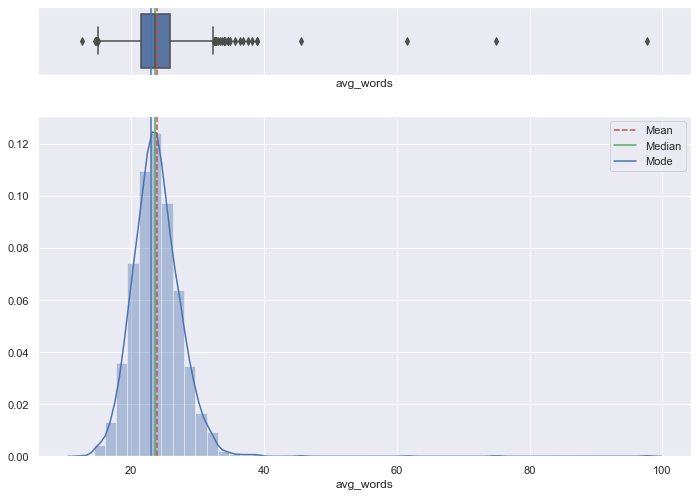

In [34]:
fig = plt.figure(figsize=(50,50))
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=auth_df['avg_words'].mean()
median=auth_df['avg_words'].median()
mode=auth_df['avg_words'].mode().get_values()[0]

sns.boxplot(auth_df['avg_words'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(auth_df['avg_words'])
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [35]:
avg_wrds_auth=auth_df['avg_words'].groupby(auth_df['author']).nunique()

In [36]:
avg_wrds_auth

author
AaronPressman        48
AlanCrosby           48
AlexanderSmith       49
BenjaminKangLim      50
BernardHickey        49
BradDorfman          48
DarrenSchuettler     47
DavidLawder          47
EdnaFernandes        50
EricAuchard          48
FumikoFujisaki       50
GrahamEarnshaw       48
HeatherScoffield     47
JanLopatka           48
JaneMacartney        49
JimGilchrist         49
JoWinterbottom       48
JoeOrtiz             49
JohnMastrini         50
JonathanBirt         48
KarlPenhaul          49
KeithWeir            47
KevinDrawbaugh       49
KevinMorrison        49
KirstinRidley        49
KouroshKarimkhany    44
LydiaZajc            45
LynneO'Donnell       49
LynnleyBrowning      48
MarcelMichelson      50
MarkBendeich         49
MartinWolk           47
MatthewBunce         49
MichaelConnor        48
MureDickie           50
NickLouth            45
PatriciaCommins      48
PeterHumphrey        50
PierreTran           47
RobinSidel           47
RogerFillion         46
SamuelPer

Text(0.5, 1.0, 'average words per author')

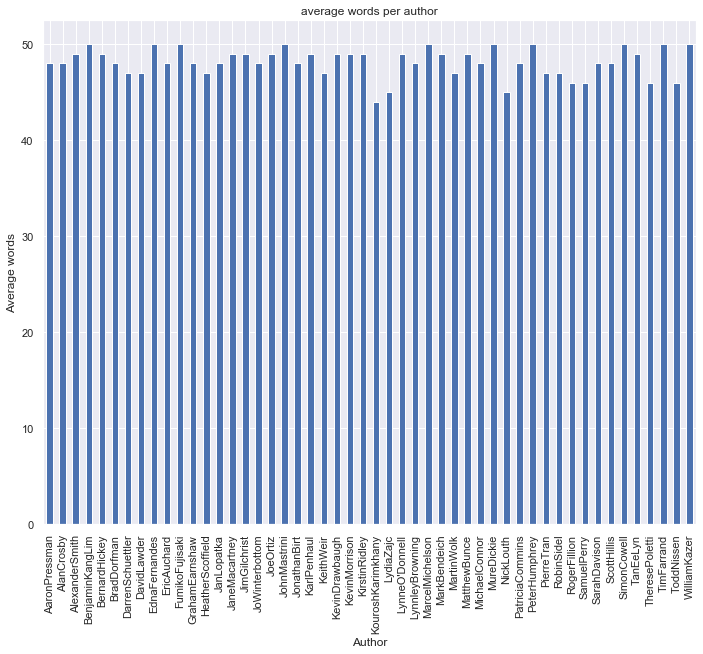

In [39]:
f, ax = plt.subplots(figsize=(11.7, 9.27))
avg_wrds_auth.plot.bar()
ax.set_ylabel('Average words')
ax.set_xlabel('Author')
ax.set_title('Average words per Author')


## Column : Avg_word_len 

In [40]:
avg_word_len_auth=round(auth_df['avg_word_len'].groupby(auth_df['author']).mean(),2)

In [41]:
avg_word_len_auth

author
AaronPressman        5.73
AlanCrosby           5.28
AlexanderSmith       5.47
BenjaminKangLim      5.49
BernardHickey        5.22
BradDorfman          5.20
DarrenSchuettler     5.14
DavidLawder          5.28
EdnaFernandes        5.32
EricAuchard          5.51
FumikoFujisaki       5.39
GrahamEarnshaw       5.39
HeatherScoffield     5.18
JanLopatka           5.45
JaneMacartney        5.56
JimGilchrist         5.19
JoWinterbottom       5.30
JoeOrtiz             5.45
JohnMastrini         5.44
JonathanBirt         5.41
KarlPenhaul          5.64
KeithWeir            5.49
KevinDrawbaugh       5.23
KevinMorrison        5.22
KirstinRidley        5.31
KouroshKarimkhany    5.38
LydiaZajc            5.01
LynneO'Donnell       5.08
LynnleyBrowning      5.39
MarcelMichelson      5.54
MarkBendeich         5.19
MartinWolk           5.41
MatthewBunce         5.28
MichaelConnor        5.47
MureDickie           5.57
NickLouth            5.10
PatriciaCommins      5.34
PeterHumphrey        5.44
Pierr

Text(0.5, 1.0, 'Average words length per Author')

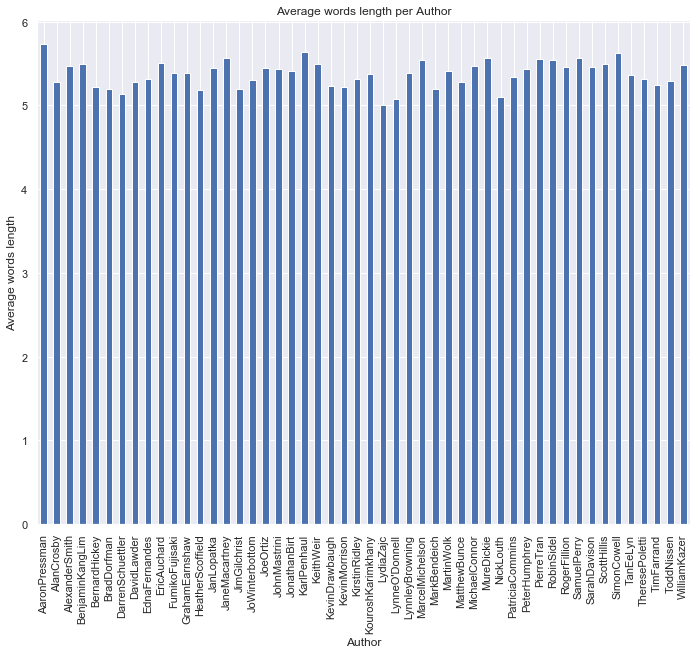

In [43]:
f, ax = plt.subplots(figsize=(11.7, 9.27))
avg_word_len_auth.plot.bar()
ax.set_ylabel('Average words length')
ax.set_xlabel('Author')
ax.set_title('Average words length per Author')

## Column : Nouns 

In [44]:
nouns_auth=round(auth_df['nouns'].groupby(auth_df['author']).mean(),2)

In [45]:
nouns_auth

author
AaronPressman        167.50
AlanCrosby           155.66
AlexanderSmith       198.54
BenjaminKangLim      188.62
BernardHickey        156.16
BradDorfman          174.46
DarrenSchuettler     192.20
DavidLawder          218.82
EdnaFernandes        152.08
EricAuchard          197.24
FumikoFujisaki       196.22
GrahamEarnshaw       176.94
HeatherScoffield     188.18
JanLopatka           157.02
JaneMacartney        213.16
JimGilchrist         120.96
JoWinterbottom       183.30
JoeOrtiz             154.96
JohnMastrini         177.56
JonathanBirt         154.34
KarlPenhaul          156.02
KeithWeir            174.34
KevinDrawbaugh       164.62
KevinMorrison        186.96
KirstinRidley        183.50
KouroshKarimkhany    161.98
LydiaZajc            126.32
LynneO'Donnell       204.18
LynnleyBrowning      197.38
MarcelMichelson      188.26
MarkBendeich         154.00
MartinWolk           179.22
MatthewBunce         182.36
MichaelConnor        168.62
MureDickie           183.82
NickLouth    

In [49]:
nouns_auth.max()

218.82

Text(0.5, 1.0, 'Nouns per Author')

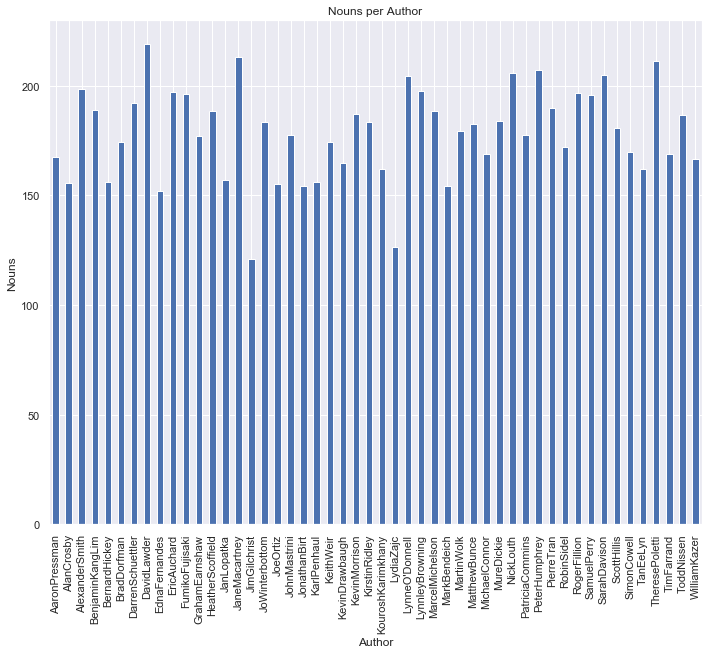

In [46]:
f, ax = plt.subplots(figsize=(11.7, 9.27))
nouns_auth.plot.bar()
ax.set_ylabel('Nouns')
ax.set_xlabel('Author')
ax.set_title('Nouns per Author')

## Column : Verbs 

In [50]:
verb_author=round(auth_df['verbs'].groupby(auth_df['author']).mean(),2)

In [51]:
verb_author

author
AaronPressman        61.68
AlanCrosby           54.40
AlexanderSmith       83.98
BenjaminKangLim      69.18
BernardHickey        65.24
BradDorfman          70.40
DarrenSchuettler     66.56
DavidLawder          73.88
EdnaFernandes        59.68
EricAuchard          69.82
FumikoFujisaki       70.98
GrahamEarnshaw       69.12
HeatherScoffield     81.66
JanLopatka           56.56
JaneMacartney        77.66
JimGilchrist         47.48
JoWinterbottom       73.70
JoeOrtiz             67.10
JohnMastrini         60.20
JonathanBirt         56.58
KarlPenhaul          52.68
KeithWeir            61.36
KevinDrawbaugh       66.74
KevinMorrison        71.82
KirstinRidley        67.60
KouroshKarimkhany    61.20
LydiaZajc            42.70
LynneO'Donnell       81.66
LynnleyBrowning      74.46
MarcelMichelson      65.02
MarkBendeich         58.66
MartinWolk           67.06
MatthewBunce         72.24
MichaelConnor        57.48
MureDickie           73.38
NickLouth            78.26
PatriciaCommins      

Text(0.5, 1.0, 'Average verbs per Author')

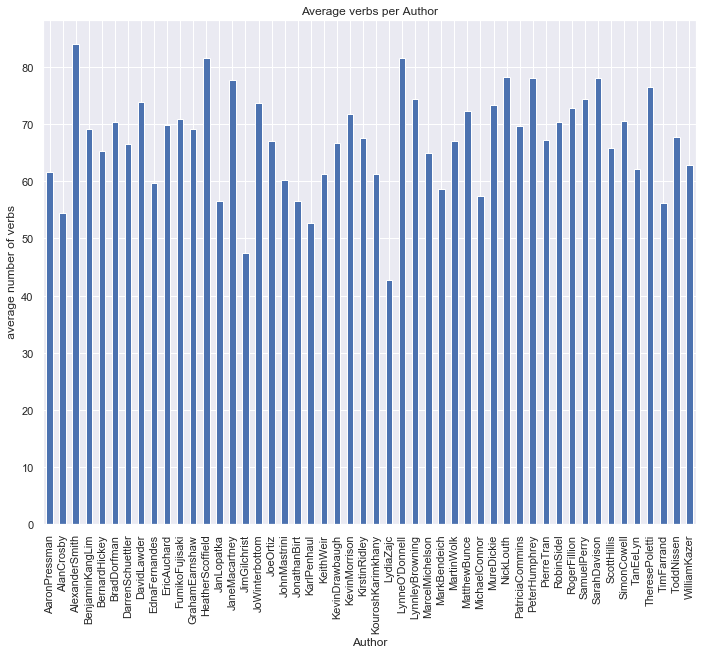

In [52]:
f, ax = plt.subplots(figsize=(11.7, 9.27))
verb_author.plot.bar()
ax.set_ylabel(' average number of verbs')
ax.set_xlabel('Author')
ax.set_title('Average verbs per Author')

## Column : Total puncuation 

In [53]:
puncts_author=round(auth_df['total_puncts'].groupby(auth_df['author']).mean(),2)

In [54]:
puncts_author

author
AaronPressman         77.68
AlanCrosby            88.08
AlexanderSmith        96.10
BenjaminKangLim       88.46
BernardHickey         87.28
BradDorfman          106.78
DarrenSchuettler     107.78
DavidLawder          106.72
EdnaFernandes         74.74
EricAuchard          101.88
FumikoFujisaki        98.80
GrahamEarnshaw        83.82
HeatherScoffield     110.14
JanLopatka            80.80
JaneMacartney         92.22
JimGilchrist          49.40
JoWinterbottom        93.18
JoeOrtiz              73.36
JohnMastrini          91.54
JonathanBirt          75.42
KarlPenhaul           66.54
KeithWeir             74.70
KevinDrawbaugh       110.16
KevinMorrison         94.52
KirstinRidley         99.36
KouroshKarimkhany     87.82
LydiaZajc             87.50
LynneO'Donnell       117.06
LynnleyBrowning       98.50
MarcelMichelson       78.92
MarkBendeich          90.30
MartinWolk            91.36
MatthewBunce          89.06
MichaelConnor         83.06
MureDickie            85.50
NickLouth    

Text(0.5, 1.0, 'Average punctuations per Author')

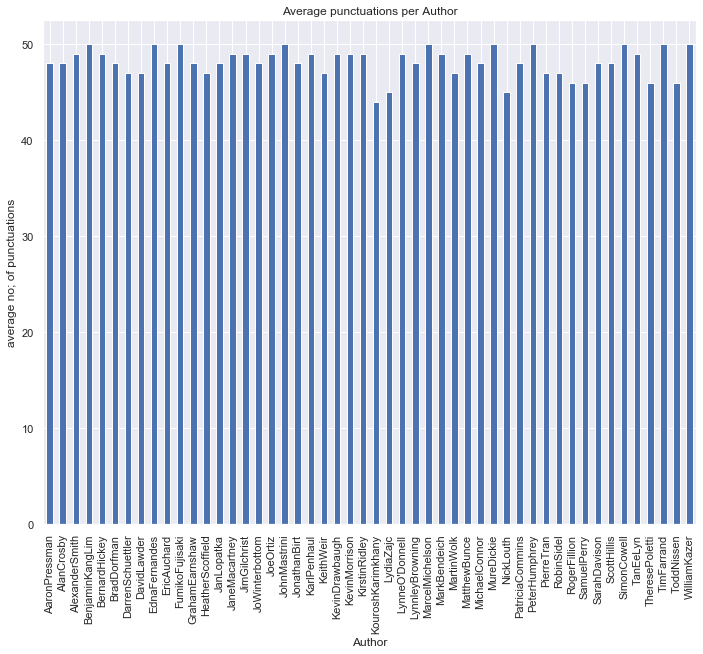

In [55]:
f, ax = plt.subplots(figsize=(11.7, 9.27))
avg_wrds_auth.plot.bar()
ax.set_ylabel('average no; of punctuations')
ax.set_xlabel('Author')
ax.set_title('Average punctuations per Author')

In [152]:
roger=auth_df[auth_df['author']=='RogerFillion']

In [159]:
(roger['total_puncts'].sum()/auth_df['total_puncts'].sum())*100

2.305583801229055

In [160]:
auth_df['total_puncts'].sum()

226190

In [161]:
roger['total_puncts'].sum()

5215

In [163]:
auth_df['total_puncts'].shape

(2500,)

In [164]:
roger['total_puncts'].mean()

104.3

## Column : sentiment score 

### Authors having positive sentiment score :

In [57]:
sent_positive=auth_df[auth_df['sentiment_score']>0]

In [58]:
sent_postive_auth=round(sent_positive['sentiment_score'].groupby(sent_positive['author']).sum(),2)

In [59]:
sent_postive_auth

author
AaronPressman         419.0
AlanCrosby            590.0
AlexanderSmith        797.0
BenjaminKangLim        48.0
BernardHickey        1090.0
BradDorfman           752.0
DarrenSchuettler      927.0
DavidLawder           383.0
EdnaFernandes         342.0
EricAuchard           789.0
FumikoFujisaki        376.0
GrahamEarnshaw        569.0
HeatherScoffield     1157.0
JanLopatka            352.0
JaneMacartney         316.0
JimGilchrist          395.0
JoWinterbottom        913.0
JoeOrtiz              606.0
JohnMastrini          410.0
JonathanBirt          758.0
KarlPenhaul            84.0
KeithWeir             924.0
KevinDrawbaugh        747.0
KevinMorrison        1106.0
KirstinRidley         875.0
KouroshKarimkhany     473.0
LydiaZajc             947.0
LynneO'Donnell         86.0
LynnleyBrowning       458.0
MarcelMichelson       405.0
MarkBendeich          529.0
MartinWolk            694.0
MatthewBunce          230.0
MichaelConnor         312.0
MureDickie            260.0
NickLouth    

Text(0.5, 1.0, 'positive Sentiment score per Author')

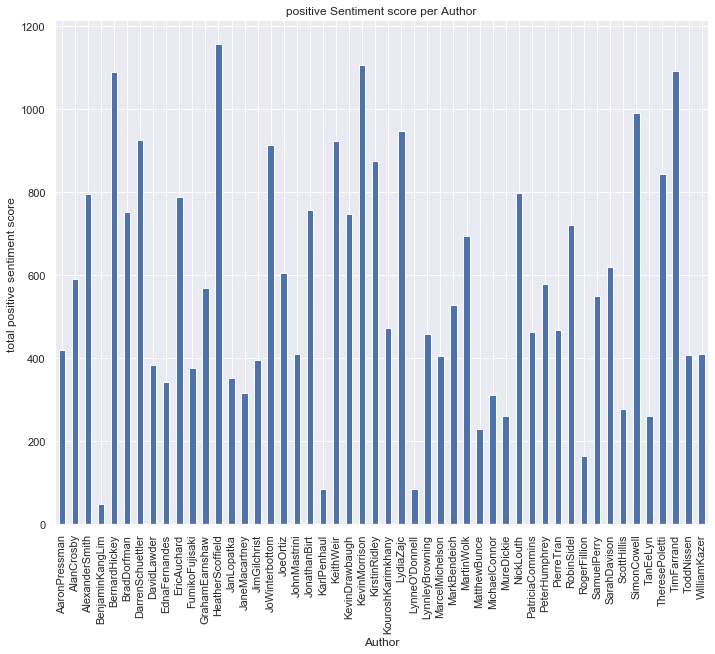

In [73]:
f, ax = plt.subplots(figsize=(11.7, 9.27))
sent_postive_auth.plot.bar()
ax.set_ylabel('total positive sentiment score ')
ax.set_xlabel('Author')
ax.set_title('positive Sentiment score per Author')

In [64]:
sent_positive['sentiment_score'].groupby(sent_positive['author']).value_counts()

author         sentiment_score
AaronPressman  3.0                5
               14.0               4
               9.0                3
               12.0               3
               10.0               2
               11.0               2
               25.0               2
               27.0               2
               1.0                1
               2.0                1
               5.0                1
               6.0                1
               8.0                1
               13.0               1
               16.0               1
               17.0               1
               19.0               1
               24.0               1
               28.0               1
AlanCrosby     11.0               5
               1.0                3
               9.0                3
               10.0               3
               19.0               3
               2.0                2
               4.0                2
               18.0              

### Percentage of positive sentiment score per author:

In [225]:
round(sent_positive['sentiment_score'].groupby(sent_positive['author']).count()/auth_df['author'].groupby(auth_df['author']).count(),2)*100

author
AaronPressman        68.0
AlanCrosby           80.0
AlexanderSmith       84.0
BenjaminKangLim      16.0
BernardHickey        94.0
BradDorfman          78.0
DarrenSchuettler     84.0
DavidLawder          66.0
EdnaFernandes        56.0
EricAuchard          90.0
FumikoFujisaki       62.0
GrahamEarnshaw       78.0
HeatherScoffield     90.0
JanLopatka           58.0
JaneMacartney        42.0
JimGilchrist         80.0
JoWinterbottom       96.0
JoeOrtiz             70.0
JohnMastrini         58.0
JonathanBirt         88.0
KarlPenhaul          24.0
KeithWeir            96.0
KevinDrawbaugh       98.0
KevinMorrison        98.0
KirstinRidley        86.0
KouroshKarimkhany    64.0
LydiaZajc            92.0
LynneO'Donnell       24.0
LynnleyBrowning      60.0
MarcelMichelson      72.0
MarkBendeich         74.0
MartinWolk           74.0
MatthewBunce         58.0
MichaelConnor        64.0
MureDickie           46.0
NickLouth            92.0
PatriciaCommins      78.0
PeterHumphrey        62.0
Pierr

## Authors having negative sentiment score  :

In [65]:
sent_negative=auth_df[auth_df['sentiment_score']<0]

In [66]:
sent_neg_auth=round(sent_negative['sentiment_score'].groupby(sent_negative['author']).sum(),2)

In [67]:
sent_neg_auth

author
AaronPressman       -141.0
AlanCrosby          -111.0
AlexanderSmith       -87.0
BenjaminKangLim     -808.0
BernardHickey        -68.0
BradDorfman         -119.0
DarrenSchuettler    -235.0
DavidLawder         -126.0
EdnaFernandes       -294.0
EricAuchard          -63.0
FumikoFujisaki      -323.0
GrahamEarnshaw       -72.0
HeatherScoffield     -27.0
JanLopatka          -233.0
JaneMacartney       -548.0
JimGilchrist         -20.0
JoWinterbottom        -7.0
JoeOrtiz            -144.0
JohnMastrini        -243.0
JonathanBirt         -69.0
KarlPenhaul         -852.0
KeithWeir             -2.0
KevinDrawbaugh       -11.0
KevinMorrison         -2.0
KirstinRidley        -35.0
KouroshKarimkhany   -126.0
LydiaZajc            -18.0
LynneO'Donnell      -391.0
LynnleyBrowning     -153.0
MarcelMichelson      -95.0
MarkBendeich        -124.0
MartinWolk          -144.0
MatthewBunce        -216.0
MichaelConnor       -203.0
MureDickie          -341.0
NickLouth            -12.0
PatriciaCommins     -

Text(0.5, 1.0, ' -ve Sentiment score per Author')

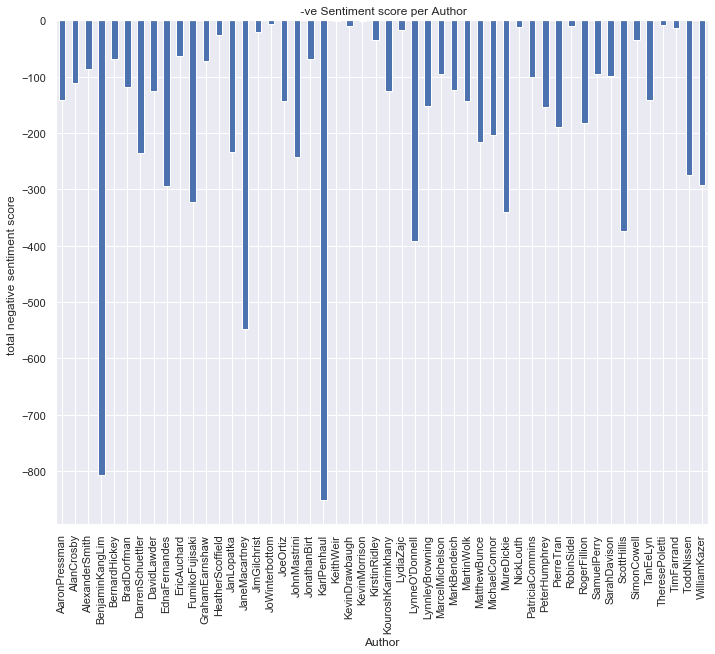

In [72]:
f, ax = plt.subplots(figsize=(11.7, 9.27))
sent_neg_auth.plot.bar()
ax.set_ylabel('total negative sentiment score ')
ax.set_xlabel('Author')
ax.set_title(' -ve Sentiment score per Author')

In [69]:
sent_negative['sentiment_score'].groupby(sent_negative['author']).value_counts()

author           sentiment_score
AaronPressman    -12.0              2
                 -8.0               2
                 -6.0               2
                 -4.0               2
                 -3.0               2
                 -18.0              1
                 -17.0              1
                 -16.0              1
                 -14.0              1
                 -9.0               1
                 -1.0               1
AlanCrosby       -26.0              2
                 -5.0               2
                 -15.0              1
                 -13.0              1
                 -9.0               1
                 -8.0               1
                 -3.0               1
                 -1.0               1
AlexanderSmith   -17.0              2
                 -3.0               2
                 -21.0              1
                 -18.0              1
                 -6.0               1
                 -2.0               1
BenjaminKangLim  

### Percentage of negative sentiment score per author

In [70]:
sent_neg_percentage=round(sent_negative['sentiment_score'].groupby(sent_negative['author']).count()/auth_df['author'].groupby(auth_df['author']).count(),2)*100

In [71]:
sent_neg_percentage

author
AaronPressman        32.0
AlanCrosby           20.0
AlexanderSmith       16.0
BenjaminKangLim      80.0
BernardHickey         6.0
BradDorfman          20.0
DarrenSchuettler     16.0
DavidLawder          32.0
EdnaFernandes        36.0
EricAuchard          10.0
FumikoFujisaki       38.0
GrahamEarnshaw       18.0
HeatherScoffield      6.0
JanLopatka           40.0
JaneMacartney        56.0
JimGilchrist         14.0
JoWinterbottom        4.0
JoeOrtiz             30.0
JohnMastrini         42.0
JonathanBirt         12.0
KarlPenhaul          76.0
KeithWeir             4.0
KevinDrawbaugh        2.0
KevinMorrison         2.0
KirstinRidley        10.0
KouroshKarimkhany    36.0
LydiaZajc             8.0
LynneO'Donnell       76.0
LynnleyBrowning      34.0
MarcelMichelson      24.0
MarkBendeich         24.0
MartinWolk           26.0
MatthewBunce         40.0
MichaelConnor        36.0
MureDickie           52.0
NickLouth             4.0
PatriciaCommins      18.0
PeterHumphrey        26.0
Pierr

Text(0.5, 1.0, 'percentage of negative Sentiment score per Author')

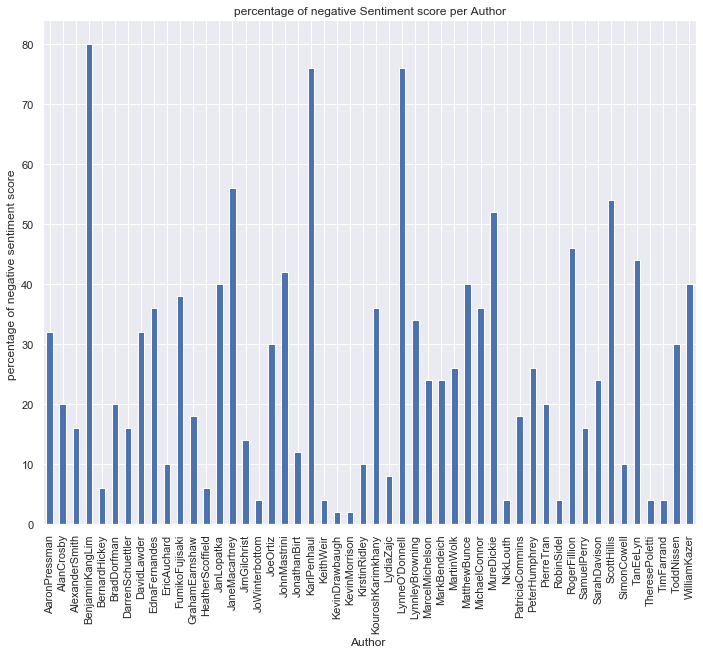

In [74]:
f, ax = plt.subplots(figsize=(11.7, 9.27))
sent_neg_percentage.plot.bar()
ax.set_ylabel('percentage of negative sentiment score ')
ax.set_xlabel('Author ')
ax.set_title('percentage of negative Sentiment score per Author')

In [222]:
auth_df['author'].groupby(auth_df['author']).count()

author
AaronPressman        50
AlanCrosby           50
AlexanderSmith       50
BenjaminKangLim      50
BernardHickey        50
BradDorfman          50
DarrenSchuettler     50
DavidLawder          50
EdnaFernandes        50
EricAuchard          50
FumikoFujisaki       50
GrahamEarnshaw       50
HeatherScoffield     50
JanLopatka           50
JaneMacartney        50
JimGilchrist         50
JoWinterbottom       50
JoeOrtiz             50
JohnMastrini         50
JonathanBirt         50
KarlPenhaul          50
KeithWeir            50
KevinDrawbaugh       50
KevinMorrison        50
KirstinRidley        50
KouroshKarimkhany    50
LydiaZajc            50
LynneO'Donnell       50
LynnleyBrowning      50
MarcelMichelson      50
MarkBendeich         50
MartinWolk           50
MatthewBunce         50
MichaelConnor        50
MureDickie           50
NickLouth            50
PatriciaCommins      50
PeterHumphrey        50
PierreTran           50
RobinSidel           50
RogerFillion         50
SamuelPer

#### total sentiment score per author :

In [228]:
auth_df['sentiment_score'].groupby(auth_df['author']).sum()

author
AaronPressman         278.0
AlanCrosby            479.0
AlexanderSmith        710.0
BenjaminKangLim      -760.0
BernardHickey        1022.0
BradDorfman           633.0
DarrenSchuettler      692.0
DavidLawder           257.0
EdnaFernandes          48.0
EricAuchard           726.0
FumikoFujisaki         53.0
GrahamEarnshaw        497.0
HeatherScoffield     1130.0
JanLopatka            119.0
JaneMacartney        -232.0
JimGilchrist          375.0
JoWinterbottom        906.0
JoeOrtiz              462.0
JohnMastrini          167.0
JonathanBirt          689.0
KarlPenhaul          -768.0
KeithWeir             922.0
KevinDrawbaugh        736.0
KevinMorrison        1104.0
KirstinRidley         840.0
KouroshKarimkhany     347.0
LydiaZajc             929.0
LynneO'Donnell       -305.0
LynnleyBrowning       305.0
MarcelMichelson       310.0
MarkBendeich          405.0
MartinWolk            550.0
MatthewBunce           14.0
MichaelConnor         109.0
MureDickie            -81.0
NickLouth    

#### Average Sentiment score :

In [326]:
sent_score_mean=auth_df.pivot_table(index='author', values='sentiment_score', aggfunc='mean')

In [327]:
sent_score_mean

,sentiment_score
author,
AaronPressman,5.56
AlanCrosby,9.58
AlexanderSmith,14.20
BenjaminKangLim,-15.20
BernardHickey,20.44
BradDorfman,12.66
DarrenSchuettler,13.84
DavidLawder,5.14
EdnaFernandes,0.96


In [ ]:
%matplotlib notebook
auth_df.groupby(['sent_score','redemption_status']).size().unstack().plot(kind='barh',stacked=True, width=0.7)
plt.show()

In [323]:
plt.figure(figsize=(50,18))

<Figure size 3600x1296 with 0 Axes>

<Figure size 3600x1296 with 0 Axes>

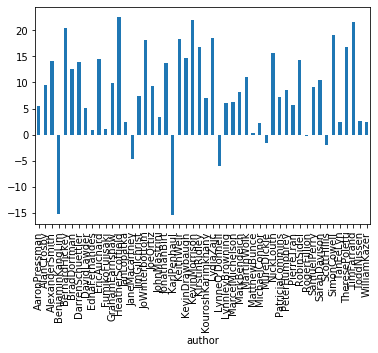

In [324]:
sent_score_mean.plot.bar()

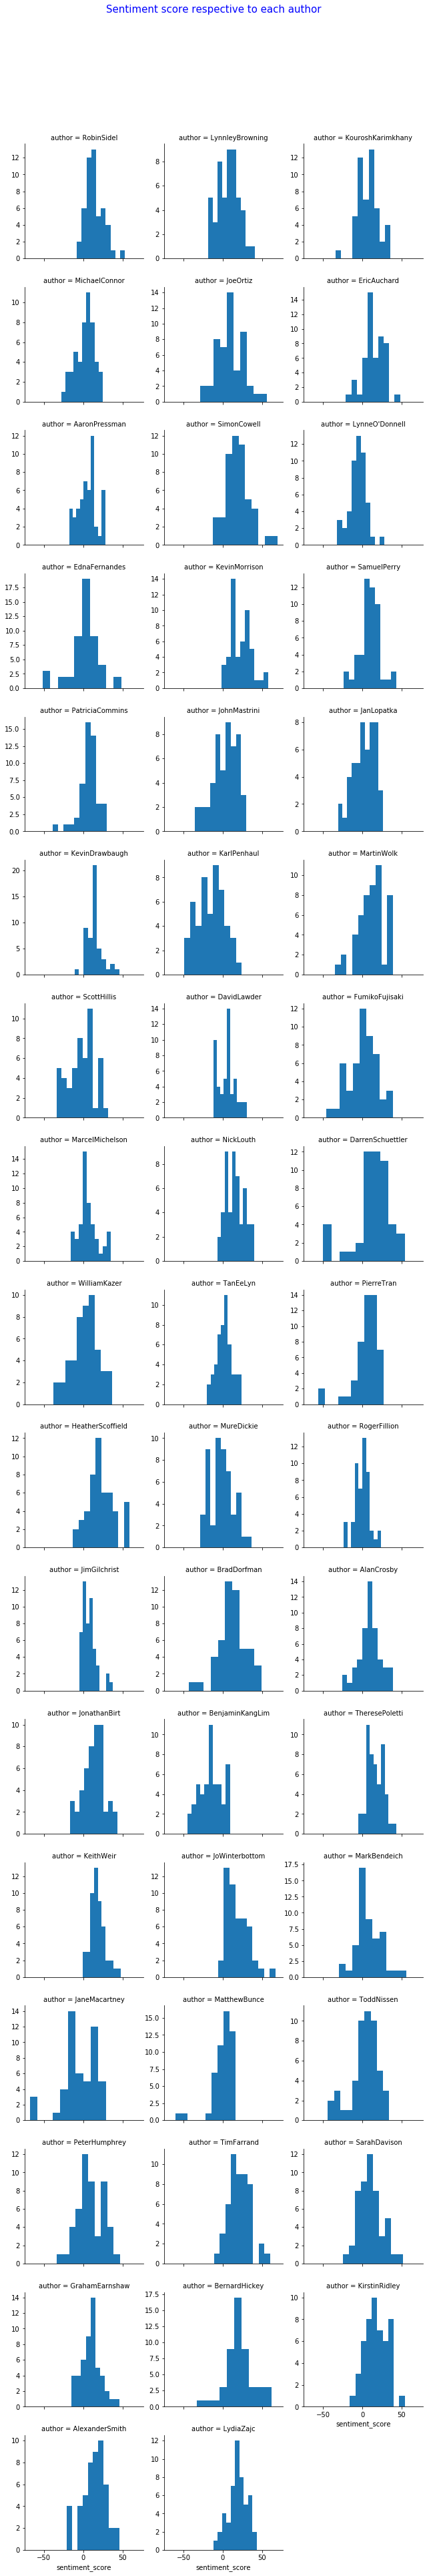

In [312]:
g = sns.FacetGrid(auth_df, col='author', sharey=False, col_wrap=3)
g.map(plt.hist, 'sentiment_score')
plt.suptitle('Sentiment score respective to each author', y=1.05, fontsize=15, color='blue')
plt.show()

## Column : Total stop words count (may duplicate)

In [242]:
auth_df['stopw_count'].groupby(auth_df['author']).sum()

author
AaronPressman         8666
AlanCrosby            8569
AlexanderSmith       11876
BenjaminKangLim      10025
BernardHickey         9135
BradDorfman           9257
DarrenSchuettler      9325
DavidLawder          10645
EdnaFernandes         8660
EricAuchard           9749
FumikoFujisaki        9900
GrahamEarnshaw       10263
HeatherScoffield     10732
JanLopatka            8917
JaneMacartney        11775
JimGilchrist          5960
JoWinterbottom       10093
JoeOrtiz              9650
JohnMastrini         10074
JonathanBirt          8634
KarlPenhaul           8479
KeithWeir             9570
KevinDrawbaugh        8446
KevinMorrison        10533
KirstinRidley         9908
KouroshKarimkhany     8070
LydiaZajc             5279
LynneO'Donnell       11293
LynnleyBrowning      10108
MarcelMichelson      10021
MarkBendeich          8745
MartinWolk            9863
MatthewBunce          9075
MichaelConnor         7800
MureDickie            9947
NickLouth            11185
PatriciaCommins      

In [241]:
auth_df['stopw_count'].groupby(auth_df['author']).mean()

author
AaronPressman        173.32
AlanCrosby           171.38
AlexanderSmith       237.52
BenjaminKangLim      200.50
BernardHickey        182.70
BradDorfman          185.14
DarrenSchuettler     186.50
DavidLawder          212.90
EdnaFernandes        173.20
EricAuchard          194.98
FumikoFujisaki       198.00
GrahamEarnshaw       205.26
HeatherScoffield     214.64
JanLopatka           178.34
JaneMacartney        235.50
JimGilchrist         119.20
JoWinterbottom       201.86
JoeOrtiz             193.00
JohnMastrini         201.48
JonathanBirt         172.68
KarlPenhaul          169.58
KeithWeir            191.40
KevinDrawbaugh       168.92
KevinMorrison        210.66
KirstinRidley        198.16
KouroshKarimkhany    161.40
LydiaZajc            105.58
LynneO'Donnell       225.86
LynnleyBrowning      202.16
MarcelMichelson      200.42
MarkBendeich         174.90
MartinWolk           197.26
MatthewBunce         181.50
MichaelConnor        156.00
MureDickie           198.94
NickLouth    

## Column : Total sentences

In [243]:
auth_df['total_sents'].groupby(auth_df['author']).sum()

author
AaronPressman        1024
AlanCrosby            896
AlexanderSmith       1213
BenjaminKangLim      1147
BernardHickey        1013
BradDorfman          1122
DarrenSchuettler     1264
DavidLawder          1165
EdnaFernandes        1032
EricAuchard          1124
FumikoFujisaki       1061
GrahamEarnshaw       1054
HeatherScoffield     1353
JanLopatka            945
JaneMacartney        1177
JimGilchrist          692
JoWinterbottom       1060
JoeOrtiz              950
JohnMastrini          943
JonathanBirt          860
KarlPenhaul           870
KeithWeir            1095
KevinDrawbaugh       1156
KevinMorrison        1110
KirstinRidley        1019
KouroshKarimkhany    1000
LydiaZajc             944
LynneO'Donnell       1254
LynnleyBrowning      1117
MarcelMichelson      1152
MarkBendeich          913
MartinWolk            991
MatthewBunce         1309
MichaelConnor         978
MureDickie            978
NickLouth            1270
PatriciaCommins      1137
PeterHumphrey        1223
Pierr

In [244]:
auth_df['total_sents'].groupby(auth_df['author']).mean()

author
AaronPressman        20.48
AlanCrosby           17.92
AlexanderSmith       24.26
BenjaminKangLim      22.94
BernardHickey        20.26
BradDorfman          22.44
DarrenSchuettler     25.28
DavidLawder          23.30
EdnaFernandes        20.64
EricAuchard          22.48
FumikoFujisaki       21.22
GrahamEarnshaw       21.08
HeatherScoffield     27.06
JanLopatka           18.90
JaneMacartney        23.54
JimGilchrist         13.84
JoWinterbottom       21.20
JoeOrtiz             19.00
JohnMastrini         18.86
JonathanBirt         17.20
KarlPenhaul          17.40
KeithWeir            21.90
KevinDrawbaugh       23.12
KevinMorrison        22.20
KirstinRidley        20.38
KouroshKarimkhany    20.00
LydiaZajc            18.88
LynneO'Donnell       25.08
LynnleyBrowning      22.34
MarcelMichelson      23.04
MarkBendeich         18.26
MartinWolk           19.82
MatthewBunce         26.18
MichaelConnor        19.56
MureDickie           19.56
NickLouth            25.40
PatriciaCommins      

In [245]:
auth_df['total_sents'].groupby(auth_df['author']).value_counts()

author         total_sents
AaronPressman  20             6
               24             5
               15             4
               23             4
               25             4
               26             4
               18             3
               21             3
               2              2
               13             2
               16             2
               17             2
               19             2
               22             2
               31             2
               11             1
               28             1
               32             1
AlanCrosby     14             7
               19             6
               12             5
               16             5
               15             4
               18             4
               13             3
               21             3
               17             2
               31             2
               37             2
               9              1
             

## Column : Total words raw

In [246]:
auth_df['total_tokens_raw'].groupby(auth_df['author']).value_counts()

author         total_tokens_raw
AaronPressman  571                 3
               623                 3
               367                 2
               370                 2
               452                 2
               559                 2
               646                 2
               57                  1
               80                  1
               298                 1
               405                 1
               413                 1
               428                 1
               429                 1
               435                 1
               445                 1
               456                 1
               469                 1
               474                 1
               478                 1
               479                 1
               484                 1
               500                 1
               514                 1
               525                 1
               528                 1
      

In [247]:
auth_df['total_tokens_raw'].groupby(auth_df['author']).sum()

author
AaronPressman        25837
AlanCrosby           25664
AlexanderSmith       33233
BenjaminKangLim      29141
BernardHickey        27144
BradDorfman          28836
DarrenSchuettler     30793
DavidLawder          33065
EdnaFernandes        24987
EricAuchard          30598
FumikoFujisaki       31246
GrahamEarnshaw       28873
HeatherScoffield     31554
JanLopatka           25520
JaneMacartney        33419
JimGilchrist         18827
JoWinterbottom       30259
JoeOrtiz             26617
JohnMastrini         28806
JonathanBirt         25350
KarlPenhaul          24041
KeithWeir            27638
KevinDrawbaugh       27242
KevinMorrison        30742
KirstinRidley        30151
KouroshKarimkhany    25814
LydiaZajc            20436
LynneO'Donnell       33403
LynnleyBrowning      31514
MarcelMichelson      29271
MarkBendeich         26358
MartinWolk           29489
MatthewBunce         28963
MichaelConnor        25193
MureDickie           28979
NickLouth            33932
PatriciaCommins      

In [248]:
auth_df['total_tokens_raw'].groupby(auth_df['author']).mean()

author
AaronPressman        516.74
AlanCrosby           513.28
AlexanderSmith       664.66
BenjaminKangLim      582.82
BernardHickey        542.88
BradDorfman          576.72
DarrenSchuettler     615.86
DavidLawder          661.30
EdnaFernandes        499.74
EricAuchard          611.96
FumikoFujisaki       624.92
GrahamEarnshaw       577.46
HeatherScoffield     631.08
JanLopatka           510.40
JaneMacartney        668.38
JimGilchrist         376.54
JoWinterbottom       605.18
JoeOrtiz             532.34
JohnMastrini         576.12
JonathanBirt         507.00
KarlPenhaul          480.82
KeithWeir            552.76
KevinDrawbaugh       544.84
KevinMorrison        614.84
KirstinRidley        603.02
KouroshKarimkhany    516.28
LydiaZajc            408.72
LynneO'Donnell       668.06
LynnleyBrowning      630.28
MarcelMichelson      585.42
MarkBendeich         527.16
MartinWolk           589.78
MatthewBunce         579.26
MichaelConnor        503.86
MureDickie           579.58
NickLouth    

## Column : Total unique tokens ( lower case + stemmed )

In [249]:
auth_df['unique_tokens_lower_stem'].groupby(auth_df['author']).value_counts()

author         unique_tokens_lower_stem
AaronPressman  174                         2
               218                         2
               223                         2
               244                         2
               260                         2
               45                          1
               59                          1
               141                         1
               159                         1
               179                         1
               191                         1
               193                         1
               196                         1
               198                         1
               202                         1
               214                         1
               217                         1
               219                         1
               220                         1
               222                         1
               225                         1
               

In [250]:
auth_df['unique_tokens_lower_stem'].groupby(auth_df['author']).sum()

author
AaronPressman        11463
AlanCrosby           12357
AlexanderSmith       13606
BenjaminKangLim      12571
BernardHickey        11370
BradDorfman          12126
DarrenSchuettler     13387
DavidLawder          14285
EdnaFernandes        11446
EricAuchard          13119
FumikoFujisaki       12844
GrahamEarnshaw       11582
HeatherScoffield     13011
JanLopatka           11455
JaneMacartney        14466
JimGilchrist          9162
JoWinterbottom       13063
JoeOrtiz             11944
JohnMastrini         12526
JonathanBirt         11880
KarlPenhaul          11848
KeithWeir            12771
KevinDrawbaugh       12078
KevinMorrison        12269
KirstinRidley        13483
KouroshKarimkhany    11222
LydiaZajc            10710
LynneO'Donnell       13273
LynnleyBrowning      13794
MarcelMichelson      12822
MarkBendeich         11472
MartinWolk           13211
MatthewBunce         12880
MichaelConnor        11305
MureDickie           12507
NickLouth            14232
PatriciaCommins      

In [252]:
auth_df['unique_tokens_lower_stem'].groupby(auth_df['author']).mean()

author
AaronPressman        229.26
AlanCrosby           247.14
AlexanderSmith       272.12
BenjaminKangLim      251.42
BernardHickey        227.40
BradDorfman          242.52
DarrenSchuettler     267.74
DavidLawder          285.70
EdnaFernandes        228.92
EricAuchard          262.38
FumikoFujisaki       256.88
GrahamEarnshaw       231.64
HeatherScoffield     260.22
JanLopatka           229.10
JaneMacartney        289.32
JimGilchrist         183.24
JoWinterbottom       261.26
JoeOrtiz             238.88
JohnMastrini         250.52
JonathanBirt         237.60
KarlPenhaul          236.96
KeithWeir            255.42
KevinDrawbaugh       241.56
KevinMorrison        245.38
KirstinRidley        269.66
KouroshKarimkhany    224.44
LydiaZajc            214.20
LynneO'Donnell       265.46
LynnleyBrowning      275.88
MarcelMichelson      256.44
MarkBendeich         229.44
MartinWolk           264.22
MatthewBunce         257.60
MichaelConnor        226.10
MureDickie           250.14
NickLouth    

## Column : Total unique tokens (lower case + stemmed - stopwords)

In [254]:
auth_df['tokens_lower_stem_sword'].groupby(auth_df['author']).sum()

author
AaronPressman         9357
AlanCrosby           10240
AlexanderSmith       11244
BenjaminKangLim      10476
BernardHickey         9214
BradDorfman           9957
DarrenSchuettler     11267
DavidLawder          12064
EdnaFernandes         9426
EricAuchard          10968
FumikoFujisaki       10611
GrahamEarnshaw        9367
HeatherScoffield     10710
JanLopatka            9334
JaneMacartney        12147
JimGilchrist          7550
JoWinterbottom       10821
JoeOrtiz              9701
JohnMastrini         10449
JonathanBirt          9874
KarlPenhaul           9838
KeithWeir            10666
KevinDrawbaugh        9909
KevinMorrison        10034
KirstinRidley        11245
KouroshKarimkhany     9290
LydiaZajc             9116
LynneO'Donnell       10901
LynnleyBrowning      11470
MarcelMichelson      10701
MarkBendeich          9493
MartinWolk           10979
MatthewBunce         10654
MichaelConnor         9371
MureDickie           10362
NickLouth            11874
PatriciaCommins      

In [255]:
auth_df['tokens_lower_stem_sword'].groupby(auth_df['author']).mean()

author
AaronPressman        187.14
AlanCrosby           204.80
AlexanderSmith       224.88
BenjaminKangLim      209.52
BernardHickey        184.28
BradDorfman          199.14
DarrenSchuettler     225.34
DavidLawder          241.28
EdnaFernandes        188.52
EricAuchard          219.36
FumikoFujisaki       212.22
GrahamEarnshaw       187.34
HeatherScoffield     214.20
JanLopatka           186.68
JaneMacartney        242.94
JimGilchrist         151.00
JoWinterbottom       216.42
JoeOrtiz             194.02
JohnMastrini         208.98
JonathanBirt         197.48
KarlPenhaul          196.76
KeithWeir            213.32
KevinDrawbaugh       198.18
KevinMorrison        200.68
KirstinRidley        224.90
KouroshKarimkhany    185.80
LydiaZajc            182.32
LynneO'Donnell       218.02
LynnleyBrowning      229.40
MarcelMichelson      214.02
MarkBendeich         189.86
MartinWolk           219.58
MatthewBunce         213.08
MichaelConnor        187.42
MureDickie           207.24
NickLouth    

# Step 5: Data Preprocessing 

In [ ]:
# Checking Correlation :

In [257]:
new_df=auth_df.drop(['author'],axis=1)

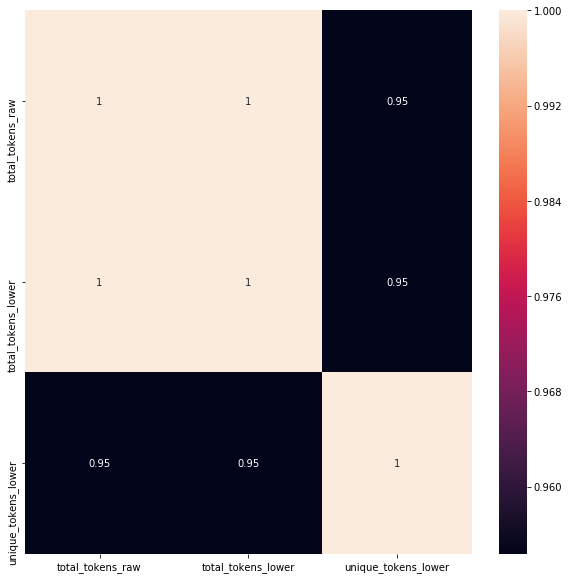

In [259]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(new_df[['total_tokens_raw','total_tokens_lower','unique_tokens_lower']].corr(), annot=True)

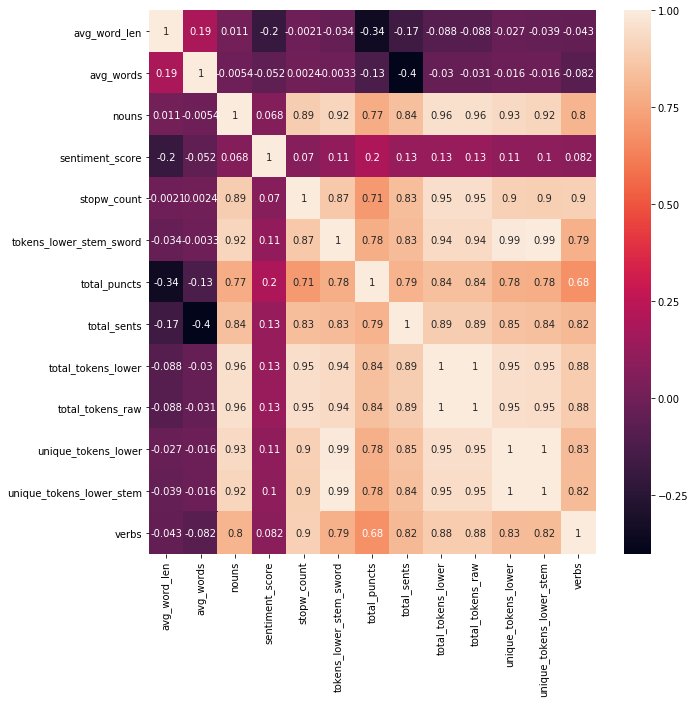

In [260]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(), annot=True)

In [269]:
new_df[['total_tokens_raw','total_tokens_lower','unique_tokens_lower','tokens_lower_stem_sword']].corr()

,total_tokens_raw,total_tokens_lower,unique_tokens_lower,tokens_lower_stem_sword
total_tokens_raw,1.000000,0.999981,0.954487,0.935967
total_tokens_lower,0.999981,1.000000,0.954345,0.935662
unique_tokens_lower,0.954487,0.954345,1.000000,0.991513
tokens_lower_stem_sword,0.935967,0.935662,0.991513,1.000000


In [263]:
auth_trail1=auth_df.copy()

In [ ]:
auth_trail1.drop(['total_tokens_raw','total_tokens_lower'],axis=1,inplace=True)

In [270]:
auth_trail1.drop(['tokens_lower_stem_sword'],axis=1,inplace=True)

In [271]:
auth_trail1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
author                      2500 non-null object
avg_word_len                2500 non-null float64
avg_words                   2500 non-null float64
nouns                       2500 non-null int64
sentiment_score             2500 non-null float64
stopw_count                 2500 non-null int64
total_puncts                2500 non-null int64
total_sents                 2500 non-null int64
unique_tokens_lower         2500 non-null int64
unique_tokens_lower_stem    2500 non-null int64
verbs                       2500 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 214.9+ KB


# Step 6:  Baseline Model :

In [301]:
X=auth_trail1.drop(['author'],axis=1)
y=auth_trail1['author']

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

## Random Forest :

In [303]:
rf=RandomForestClassifier()

In [304]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [305]:
y_pred = rf.predict(X_test)

In [306]:
accuracy_score(y_test,y_pred)

0.24

## Logistic Regression :

In [280]:
lr=LogisticRegression()

In [281]:
lr.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [282]:
y_pred_lr = lr.predict(X_test)

In [283]:
accuracy_score(y_test,y_pred_lr)

0.1824

### Check Feature Importance :

In [307]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
avg_word_len,0.114
avg_words,0.114
sentiment_score,0.110
total_puncts,0.110
stopw_count,0.106
nouns,0.102
verbs,0.096
unique_tokens_lower_stem,0.092
unique_tokens_lower,0.091


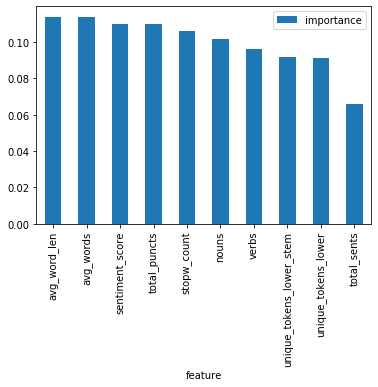

In [308]:
importances.plot.bar()

## RFE 

In [284]:
rfe = RFE(lr, 6)
rfe.fit(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=6, step=1, verbose=0)

In [285]:
sel_cols = []
for a, b, c in zip(rfe.support_, rfe.ranking_, X.columns):
    print(a, b, c)
    if b == 1:
        sel_cols.append(c)

False 5 avg_word_len
True 1 avg_words
False 4 nouns
False 3 sentiment_score
True 1 stopw_count
False 2 total_puncts
True 1 total_sents
True 1 unique_tokens_lower
True 1 unique_tokens_lower_stem
True 1 verbs


In [286]:
print(sel_cols)

['avg_words', 'stopw_count', 'total_sents', 'unique_tokens_lower', 'unique_tokens_lower_stem', 'verbs']


## Baseline models on the selected features by RFE 

In [287]:
X_sel = X[sel_cols]

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, train_size=0.7, random_state=7)

### LOGISTIC REGRESSION

In [289]:
lr.fit(X_train, y_train)

y_pred_rfe = lr.predict(X_test)

print(accuracy_score(y_test, y_pred_rfe))

0.12666666666666668


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Random Forest:

In [290]:
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(accuracy_score(y_test, y_pred_rf))

0.168


In [294]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
avg_words,0.191
stopw_count,0.187
verbs,0.172
unique_tokens_lower,0.170
unique_tokens_lower_stem,0.165
total_sents,0.115


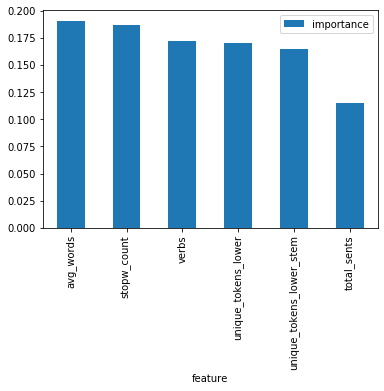

In [295]:
importances.plot.bar()

In [ ]:
#------------------------- WORD VECTORIZATION -------------

In [77]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [79]:
vect=CountVectorizer

In [80]:
print(vect)

<class 'sklearn.feature_extraction.text.CountVectorizer'>
